# Project 1: Data Cleaning, Visualization, and Mining

In [2]:
%matplotlib inline

In [176]:
# Add all of your import statements here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.plotly as p
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.tools as r
import plotly.offline as py
r.set_credentials_file()
import plotly.tools as tls
py.init_notebook_mode(connected=True)
sns.set()
"""
How is the average income in a census tract or a county related to the percentage of people 
working in different industries (professionals, service industries, manufacturing 
industries etc.), the racial demographics of the area, or the geographic region of 
the United States (Northeast vs West Coast)? How accurately can you predict the child
poverty rate in a census tract or a county using linear regression and data from 
employment figures, racial 
demographics, and other factors in the 2015 American Community Survey?






"""

'\nHow is the average income in a census tract or a county related to the percentage of people \nworking in different industries (professionals, service industries, manufacturing \nindustries etc.), the racial demographics of the area, or the geographic region of \nthe United States (Northeast vs West Coast)? How accurately can you predict the child\npoverty rate in a census tract or a county using linear regression and data from \nemployment figures, racial \ndemographics, and other factors in the 2015 American Community Survey?\n\n\n\n\n\n\n'

# Setup, Cleaning, Organizing, and Exploring the Data

Let's now try to read in the data, clean up the data by getting rid of NAs, and explore the data. Feel free to use any commands to do these parts. As always, report your steps in the writeup.

In [148]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [165]:
df = pd.read_csv('acs2015_county_data.csv')
df['Employment'] = 100 - df['Unemployment']

In [166]:
df.dropna()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Employment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,92.4
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,92.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,82.4
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,91.7
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,92.3
5,1011,Alabama,Bullock,10678,5660,5018,4.4,22.2,70.7,1.2,...,1.7,2.8,27.5,3865,79.5,15.1,5.4,0.0,18.0,82.0
6,1013,Alabama,Butler,20354,9502,10852,1.2,53.3,43.8,0.1,...,0.6,1.7,24.6,7813,77.4,16.2,6.2,0.2,10.9,89.1
7,1015,Alabama,Calhoun,116648,56274,60374,3.5,73.0,20.3,0.2,...,1.2,2.7,24.1,47401,74.1,20.8,5.0,0.1,12.3,87.7
8,1017,Alabama,Chambers,34079,16258,17821,0.4,57.3,40.3,0.2,...,0.4,2.1,25.1,13689,85.1,12.1,2.8,0.0,8.9,91.1
9,1019,Alabama,Cherokee,26008,12975,13033,1.5,91.7,4.8,0.6,...,0.7,2.5,27.4,10155,73.1,18.5,7.9,0.5,7.9,92.1


In [5]:
df.describe()
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [6]:
df.describe()

#df['Men_prop'] = df['Men']/df['TotalPop']*100 
#df['Women_prop'] = df['Women']/df['TotalPop']*100 


,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [19]:

NC = df[df.State == "North Carolina"]
df_NC = pd.DataFrame(NC)
#df_NC.head
#df_NC.describe()
df_NC.columns


Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [161]:
WomenProp = df_NC['Women']/df_NC['TotalPop']
MenProp = df_NC['Men']/df_NC['TotalPop']
df_NC.columns
MenProp[:10]
df_NC['MenProp'] = MenProp
df_NC['WomenProp'] = WomenProp
#df_NC.assign(WomenProp = df_NC['Women']/df_NC['TotalPop'])
df_NC.columns
df_NC['EmployedProp'] = 100 - df_NC['Unemployment']
df_NC['State'][:10]

1890    North Carolina
1891    North Carolina
1892    North Carolina
1893    North Carolina
1894    North Carolina
1895    North Carolina
1896    North Carolina
1897    North Carolina
1898    North Carolina
1899    North Carolina
Name: State, dtype: object

# Visualizing the Data

This is the most fun part of the project! Now you can go ahead and create your graphs (appropriately labeled of course), models, and other visualizations. Make sure you demonstrate your ability to create rich graphs by creating various different types of graphs, both for numerical as well as categorical data. 

Here are some types of graphs that you will want to create for this project. Remember to browse the online documentation for many Python graphing and visualization packages such as plotly, seaborn, and matplotlib if you need to borrow any code or get some help!
1. Creating multiple graphs that plot important financial indicators (y-axis) like the median annual income, per capita income, poverty rate, childhood poverty rate, and/or unemployment rate present in a particular county AGAINST several features in the dataset (x-axis) that might affect these factors, such as the total population of the county; the racial demographics of the county; or the occupations of different workers (professionals, service workers, construction, manufacturing).   

2. Using plotly as a graphing library to visualize these financial indicators in the 2015 American Community Survey data on a geographical map of the United States on a state-wide or county-based level (similar to what we did in class when we visualized global average temperatures for different countries on a global map). 

In [191]:
#choose a county, graph 
df_NC.loc[df_NC['Unemployment'] == max(df_NC['Unemployment'])]
df_NC['Professional'][:10]

1890    31.7
1891    25.5
1892    29.8
1893    21.5
1894    26.3
1895    26.5
1896    29.3
1897    23.9
1898    24.9
1899    28.8
Name: Professional, dtype: float64

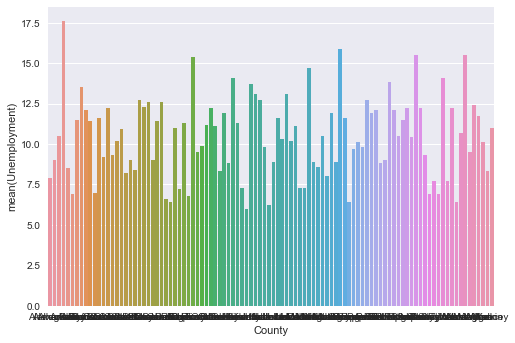

In [74]:
sns.barplot(x='County', y='Unemployment',data=df_NC)


In [190]:
#@source: Plotly
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('mathcricket', '1aiUPP6nrGzaYRtATsQP')
trace1 = {
  "z": [11.3104477612, 9.85517241379, 11.9666666667, 8.98266666667, 10.8, 7.45625, 8.1625, 7.93333333333, 10.3835820896, 9.97421383648, 6.5, 7.08181818182, 7.97450980392, 7.33369565217, 4.60808080808, 4.64857142857, 9.3375, 9.2328125, 7.4375, 7.475, 7.29285714286, 9.96265060241, 4.97586206897, 12.0243902439, 7.6052173913, 5.55357142857, 3.34516129032, 10.4764705882, 5.81, 8.96666666667, 8.4696969697, 7.85806451613, 10.452, 2.68113207547, 7.95795454545, 6.32987012987, 9.92777777778, 7.22985074627, 7.56, 11.3304347826, 5.60454545455, 9.50315789474, 6.70513833992, 5.95862068966, 5.93571428571, 7.28796992481, 8.84102564103, 8.67090909091, 6.17222222222, 4.59130434783], 
  "autocolorscale": False, 
  "colorbar": {"title": "Unemployment"}, 
  "colorscale": ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1", "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9", "#08519c", "#0b4083", "#08306b"], 
  "locationmode": "USA-states", 
  "locations": ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"], 
  "marker": {"line": {
      "color": "rgb(255,255,255)", 
      "width": 2
    }}, 
  "text": ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"], 
  "type": "choropleth"
}
data = Data([trace1])
layout = {
  "geo": {
    "lakecolor": "rgb(255, 255, 255)", 
    "projection": {"type": "albers usa"}, 
    "scope": "usa", 
    "showlakes": True
  }, 
  "title": "Unemployment in US States"
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

[6.4, 93.6] [17.6, 82.4]


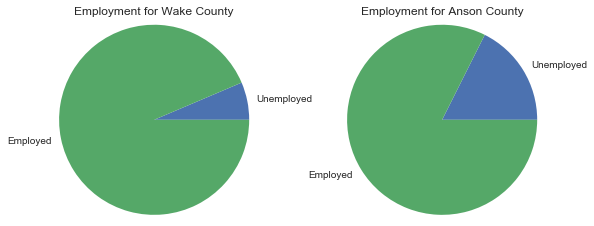

In [147]:
labels = 'Unemployed', 'Employed'

fig = plt.figure()
values1 = [df_NC.loc[df_NC['County'] == 'Wake']['Unemployment'].tolist()[0],100-df_NC.loc[df_NC['County'] == 'Wake']['Unemployment'].tolist()[0]]
values2 = [df_NC.loc[df_NC['County'] == 'Anson']['Unemployment'].tolist()[0],100-df_NC.loc[df_NC['County'] == 'Anson']['Unemployment'].tolist()[0]]
print(values1, values2)
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(values1, labels=labels, radius = 1.2)
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(values2, labels=labels, radius = 1.2)
ax1.set_title('Employment for Wake County')
ax2.set_title('Employment for Anson County')
plt.show()

# Linear Regression

Make sure you also demonstrate your ability to create regressions on your data. In this part of the project, you will pick 3 financial indicators (like the median annual income, per capita income, poverty rate, childhood poverty rate, and/or unemployment rate) in the dataset. You will then train 3 linear regression models in scikit-learn that attempt to predict these 3 financial indicators of a county from the rest of the data collected in the dataset. You should analyze the accuracy of your linear regression model and report important predictors or features in your dataset that had the highest effect size on these 3 financial indicators (as discovered by your regression model). 

Optional: You can try adding regularization to see if you can get better results. 

In [70]:
#predict poverty rate with predictors of unemployment, publicwork, income per capita
#case for poverty vs unemployment
#80% training, 20% test
#below is code for test
import statsmodels.api as sm
exp_dat = df_NC[["Unemployment","PublicWork","IncomePerCap"]][0:81]

myMLR = sm.OLS(df_NC['Poverty'][0:81], exp_dat).fit()
myMLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Poverty   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     646.7
Date:                Thu, 01 Mar 2018   Prob (F-statistic):           5.52e-55
Time:                        15:00:34   Log-Likelihood:                -223.56
No. Observations:                  81   AIC:                             453.1
Df Residuals:                      78   BIC:                             460.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Unemployment     1.5385      0.143     10.758      0.000       1.254       1.823
PublicWork       0.0607      0.088      0.689      0.493      -0.115       0.236
IncomePerCap  6.981e-05   5.84e-05      1.195      0.236   -4.65e-05       0.000
==============================================================================
Omnibus:                        1.179   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                0.644
Skew:                           0.162   Prob(JB):                        0.725
Kurtosis:                       3.292   Cond. No.                     8.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
#below is calculating MSE to measure how accurate model is
test = df_NC[["Unemployment","PublicWork","IncomePerCap"]][81:]
m = np.linalg.norm(df_NC['Poverty'][0:81]-myMLR.predict(df_NC[["Unemployment","PublicWork","IncomePerCap"]][0:81]))**2/len(df_NC['Poverty'][0:81])
Unemployment_hat = myMLR.predict(test)
mse = np.linalg.norm(df_NC['Poverty'][81:] - Unemployment_hat)**2/len(df_NC['Poverty'][81:])
print("The MSE for the train model Unemployment-publicwork-incomepercapita is:", m)
print("The MSE for the test model Unemployment-publicwork-incomepercapita is:", mse)

The MSE for the train model Unemployment-publicwork-incomepercapita is: 14.6151867205
The MSE for the test model Unemployment-publicwork-incomepercapita is: 30.7375985661


In [149]:
#2nd linear regression model:
#predicting per capita income based off of private work, public work, self-employed
exp_d = df_NC[["PrivateWork","PublicWork","SelfEmployed"]][0:81]

myMLR = sm.OLS(df_NC['IncomePerCap'][0:81], exp_d).fit()
myMLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           IncomePerCap   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     824.7
Date:                Thu, 01 Mar 2018   Prob (F-statistic):           5.87e-59
Time:                        21:59:28   Log-Likelihood:                -787.71
No. Observations:                  81   AIC:                             1581.
Df Residuals:                      78   BIC:                             1589.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
PrivateWork    236.3423     21.022     11.242      0.000     194.490     278.194
PublicWork     111.7085     77.185      1.447      0.152     -41.956     265.373
SelfEmployed   438.4649    176.610      2.483      0.015      86.862     790.068
==============================================================================
Omnibus:                       14.856   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.620
Skew:                           0.977   Prob(JB):                     0.000246
Kurtosis:                       4.052   Cond. No.                         30.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
test = df_NC[["PrivateWork","PublicWork","SelfEmployed"]][81:]
m = np.linalg.norm(df_NC['IncomePerCap'][0:81]-myMLR.predict(df_NC[["PrivateWork","PublicWork","SelfEmployed"]][0:81]))**2/len(df_NC['IncomePerCap'][0:81])
Income_hat = myMLR.predict(test)
mse = np.linalg.norm(df_NC['IncomePerCap'][81:] - Income_hat)**2/len(df_NC['IncomePerCap'][81:])
print("The MSE for the train model IncomePerCap-PrivateWork-PublicWork-Self is:", m)
print("The MSE for the test model IncomePerCap-PrivateWork-PublicWork-Self is:", mse)

The MSE for the train model IncomePerCap-PrivateWork-PublicWork-Self is: 16383256.4402
The MSE for the test model IncomePerCap-PrivateWork-PublicWork-Self is: 18371414.3296


In [195]:
#3rd and final regression:

df_NC['CitizenProp'] = df_NC['Citizen']/df_NC['TotalPop']
df_NC['CitizenProp'][:10]
df_NC.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'MenProp', 'WomenProp',
       'UnemployedProp', 'EmployedProp', 'CitizenProp'],
      dtype='object')

In [198]:
#predicting CitizenProp off of professional, office, service, production, construction
exp = df_NC[["Professional","Office","Service","Construction", "Production"]][0:81]
my = sm.OLS(df_NC['CitizenProp'][0:81], exp).fit()
my.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CitizenProp   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     7652.
Date:                Thu, 01 Mar 2018   Prob (F-statistic):          3.62e-101
Time:                        23:16:16   Log-Likelihood:                 160.04
No. Observations:                  81   AIC:                            -310.1
Df Residuals:                      76   BIC:                            -298.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Professional     0.0056      0.001      8.564      0.000       0.004       0.007
Office           0.0078      0.001      5.818      0.000       0.005       0.010
Service          0.0105      0.001      9.091      0.000       0.008       0.013
Construction     0.0090      0.001      6.803      0.000       0.006       0.012
Production       0.0063      0.001      9.269      0.000       0.005       0.008
==============================================================================
Omnibus:                       10.880   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.970
Skew:                          -0.836   Prob(JB):                      0.00415
Kurtosis:                       3.673   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
test = df_NC[["Professional","Office","Service","Construction", "Production"]][81:]
m = np.linalg.norm(df_NC['CitizenProp'][:81]-my.predict(df_NC[["Professional","Office","Service","Construction", "Production"]][:81]))**2/len(df_NC['CitizenProp'][:81])
Cit_hat = my.predict(test)
mse = np.linalg.norm(df_NC['CitizenProp'][81:] - Cit_hat)**2/len(df_NC['CitizenProp'][81:])
print("The MSE for the train model IncomePerCap-PrivateWork-PublicWork-Self is:", m)
print("The MSE for the test model IncomePerCap-PrivateWork-PublicWork-Self is:", mse)

The MSE for the train model IncomePerCap-PrivateWork-PublicWork-Self is: 0.00112545399785
The MSE for the test model IncomePerCap-PrivateWork-PublicWork-Self is: 0.00157024654351
